In [1]:
from deepSculpt.manager.tools.params import COLORS
from deepSculpt.sculptor.sculptor import Sculptor
from deepSculpt.manager.tools.plotter import Plotter
from deepSculpt.curator.tools.preprocessing import OneHotEncoderDecoder

import os

2023-02-26 17:48:26.511241: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-26 17:48:55.204434: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from deepSculpt.collector.collector import Collector

collector = Collector(
    void_dim=int(os.environ.get("VOID_DIM")),
    edge_elements=(40, 0.7, 0.9),
    plane_elements=(15, 0.4, 0.9),
    volume_elements=(5, 0.3, 0.7),
    step=None,
    directory='.',
    n_samples=50,
    grid=1,
)

# Creates the data
volumes_void, materials_void = collector.create_collection()


 🔽 Just created 'volume_data' shaped (50, 16, 16, 16) and 'material_data' shaped(50, 16, 16, 16)


TypeError: Plotter.plot_sculpture() got an unexpected keyword argument 'vectorial_picture'

In [ ]:
materials = [COLORS['edges'], COLORS['planes']] + COLORS['volumes'] + [None]

materials

['dimgrey', 'snow', 'crimson', 'turquoise', 'gold', None]

In [10]:
preprocessing_class_o = OneHotEncoderDecoder(materials_void, materials=materials, verbose=1)

o_encode, o_classes = preprocessing_class_o.ohe_encode()


 🔀 A number of 50 samples shaped (50, 48, 48, 48) have been encoded in 6 classes: ['dimgrey' 'snow' 'crimson' 'turquoise' 'gold' None]


In [11]:
decode_volumes_void, decode_materials_void = preprocessing_class_o.ohe_decode(o_encode)



 🔀 A number of 50 samples shaped (50, 48, 48, 48, 6) have been decoded in 6 classes: ['dimgrey' 'snow' 'crimson' 'turquoise' 'gold' None]



 🔽 Plotting [17-02-2023-19-16-31]

 ✅ Just created a snapshot image[17-02-2023-19-16-31].png @ /Users/juan-garassino/code/juan-garassino/deepSculpt/results/picture


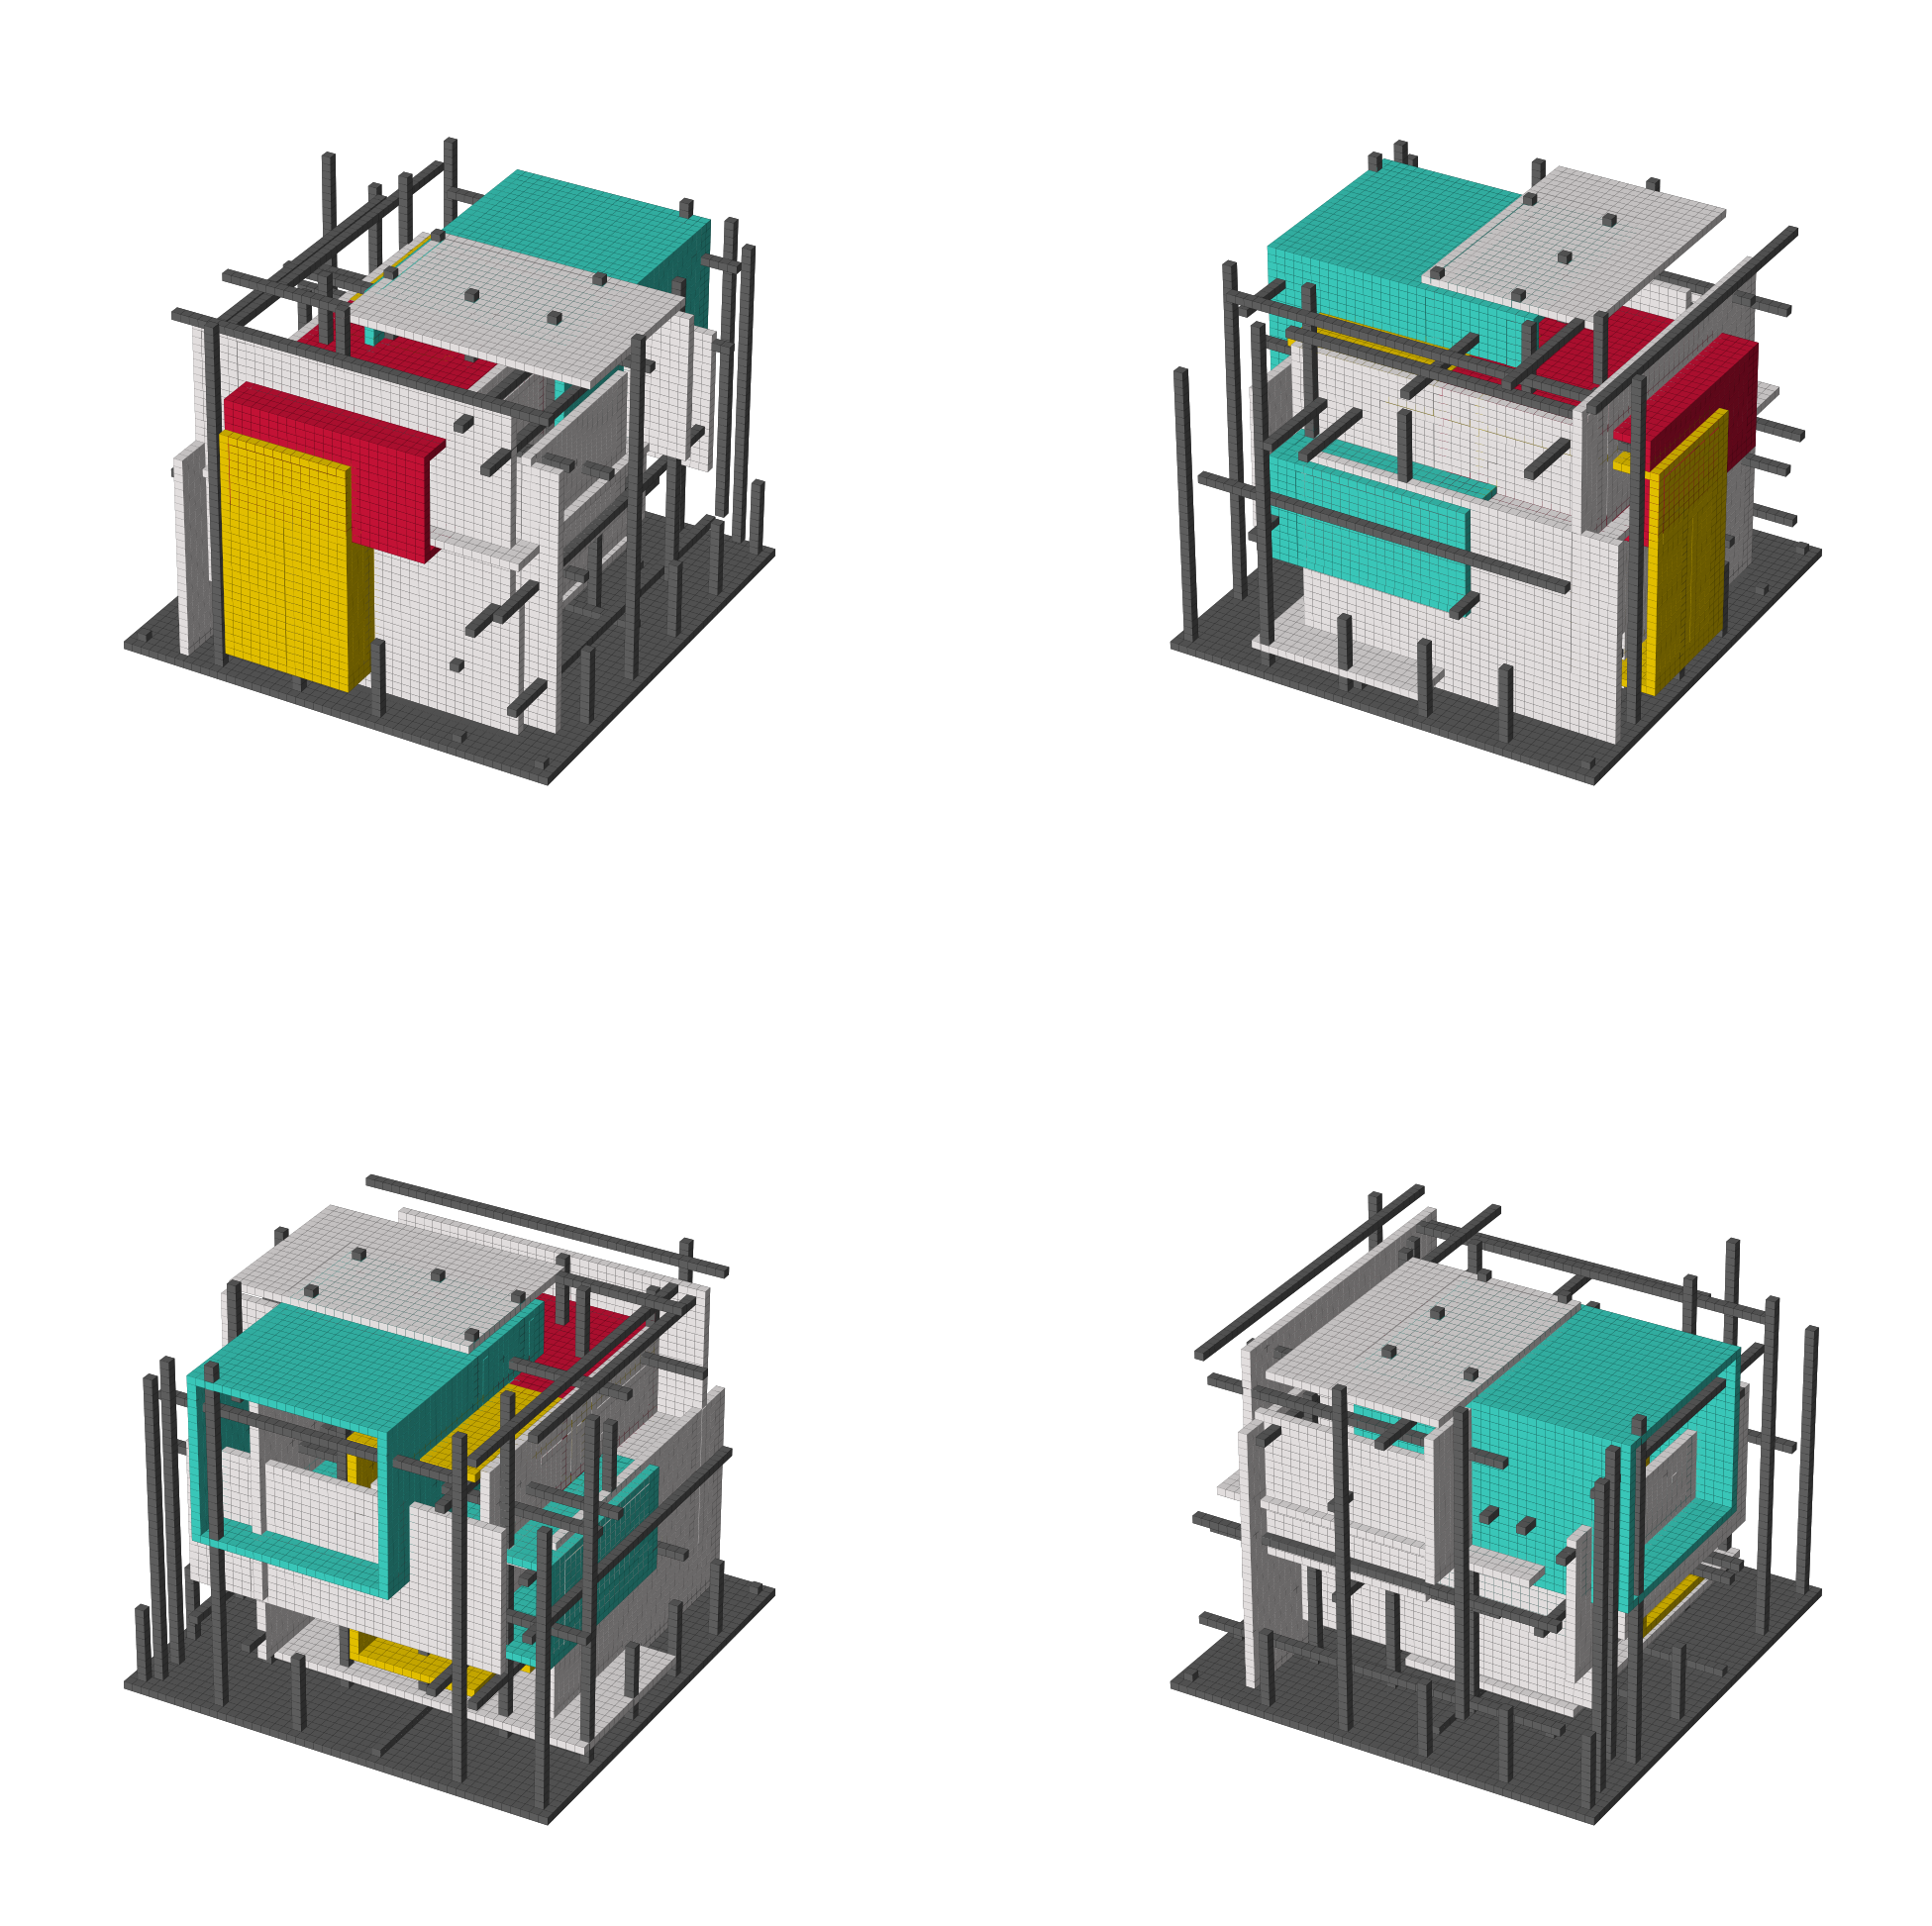

In [12]:
plot = Plotter(volumes=decode_volumes_void[0, :, :, :],
               colors=decode_materials_void[0, :, :, :])

out_dir = os.path.join(os.environ.get("HOME"), "code", "juan-garassino",
                       "deepSculpt", 'results')

plot.plot_sculpture(out_dir, raster_picture=True, hide_axis=True)


 🔽 Plotting [17-02-2023-19-12-55]


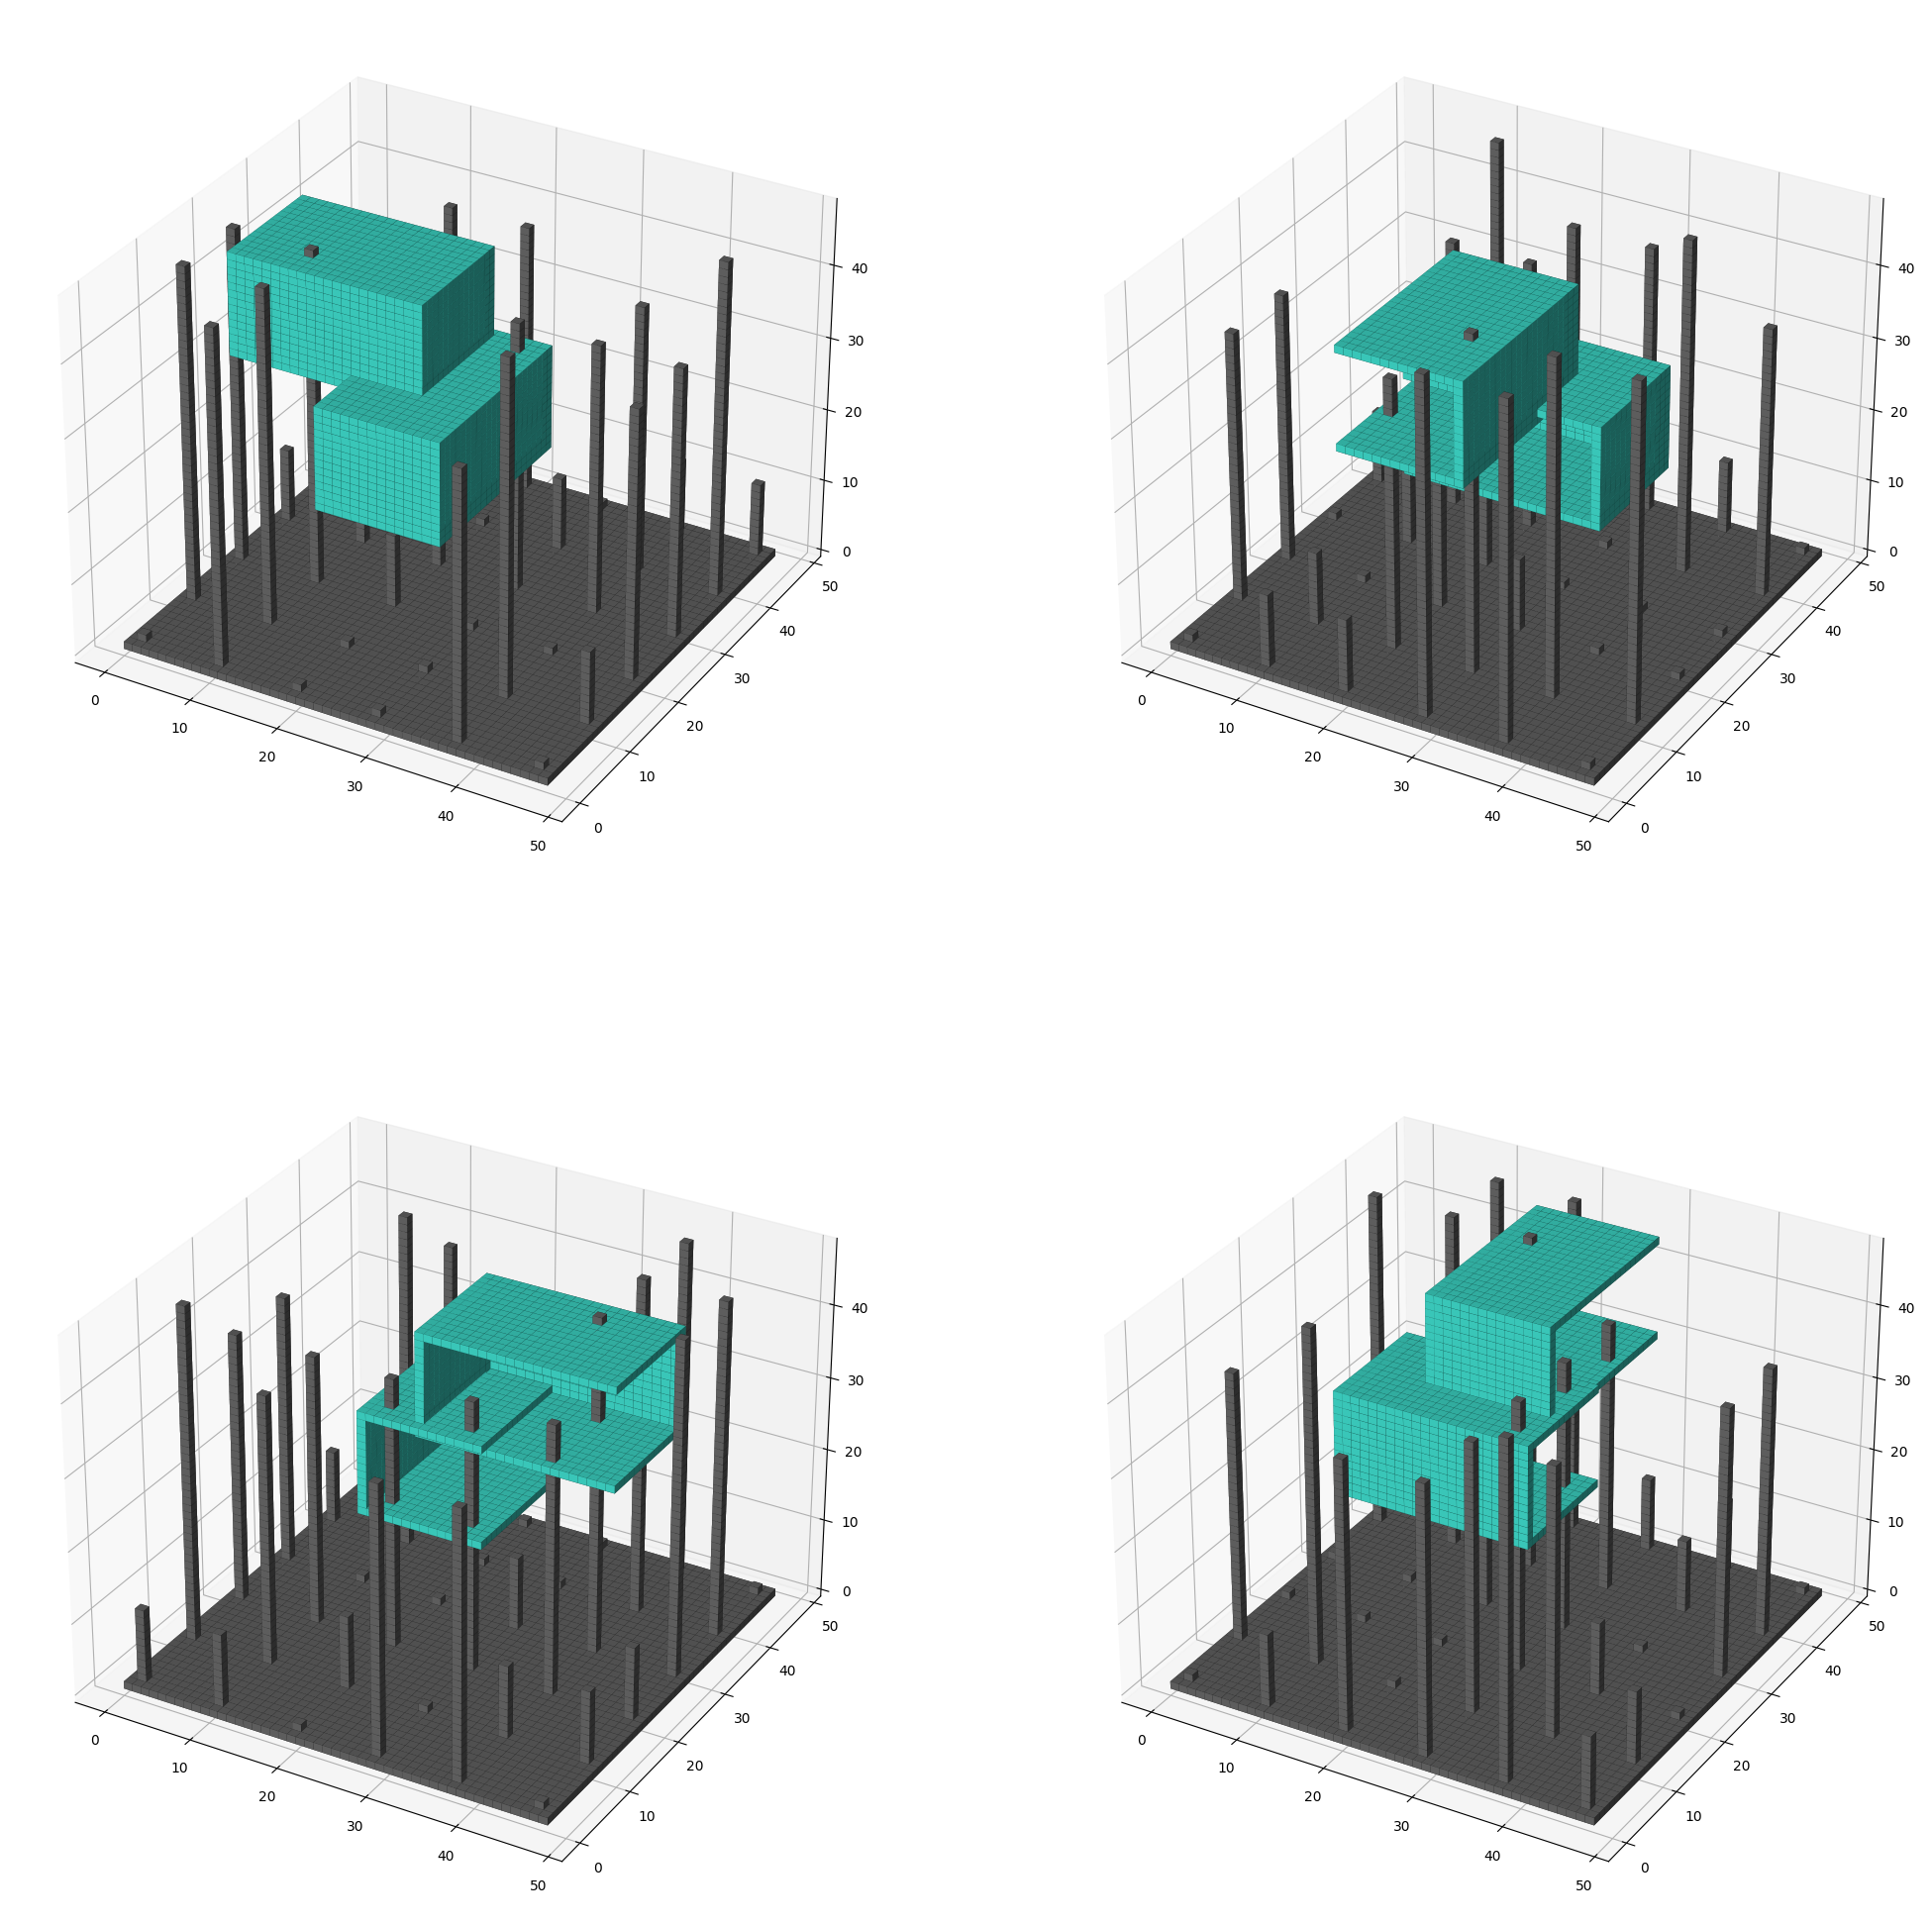

In [7]:
plot = Plotter(volumes=decode_volumes_void[3, :, :, :],
               colors=decode_materials_void[3, :, :, :])

out_dir = os.path.join(os.environ.get("HOME"), "code", "juan-garassino",
                       "deepSculpt", 'results')

plot.plot_sculpture(out_dir)

'4e-09'